# Intro to machine learning in python


In [5]:
from sklearn import datasets  #Importing the dataset
iris = datasets.load_iris()
import matplotlib.pyplot as plt


In [6]:
from sklearn.naive_bayes import GaussianNB #imprting the model
gnb=GaussianNB()

In [7]:
gnb_model=gnb.fit(iris.data,iris.target)

In [8]:
from pandas import DataFrame

In [9]:
data1={}

for item,value in iris.items():
    if item in ['data','target']:
        data1[item]=value


In [10]:
y = gnb_model.predict(iris.data)


In [11]:
(y != iris.target).sum()  #Number of misclassified points

6

In [12]:
#!/usr/bin/python
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

In [13]:
    import numpy as np
    
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    

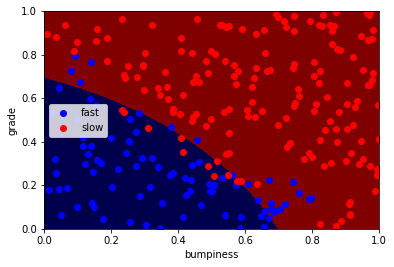

In [14]:
    features_train, labels_train, X_test, y_test = makeTerrainData(1000) 
    
    
    
    from sklearn.naive_bayes import GaussianNB
    gnbc = GaussianNB()
    clf= gnbc.fit(features_train,labels_train)
    
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .001  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.show()

In [17]:
wrong_pred = (y_test!=clf.predict(X_test)).sum()
total_pred = len(y_test)

accuracy = float(total_pred-wrong_pred)/float(total_pred)

accuracy

0.884

In [56]:
# Alternative is to use sklearn library available

from sklearn.metrics import accuracy_score
print accuracy_score(clf.predict(X_test),y_test)

0.924


# Decision Tree Algorithms

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dtc = DecisionTreeClassifier(min_samples_split=3,max_depth=4,min_samples_leaf=10) 
#parameters- presort,min_sasmples_split,min_impurity_split,\
#random_split,max_leaf_nodes,min_samples_leaf
#min_fractaion_weight_leaf, class_weight, random_state

clf = dtc.fit(features_train, labels_train)
pred = clf.predict(X_test)

accuracy_score(pred,y_test)

0.92000000000000004

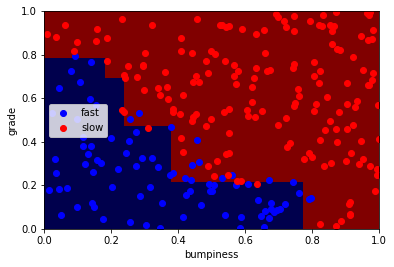

In [74]:
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.show()

## Advanced decision tree algorithms including adaboost, random forests and k nearest neighbors

* K nearest neighbors - classic simple and easy to understand
* adaboost - ensemble methods
* Random forests - meta classifiers built from usually decision trees

# AdaBoost

In [146]:
# Investigation process
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators = 80,learning_rate = 0.8) 
#Parameters - base_estimator,n_estimators,learning_rate,algorithm,random_state

clf = ab.fit(features_train,labels_train)
pred = clf.predict(X_test)

accuracy_score(pred,y_test)

0.92400000000000004

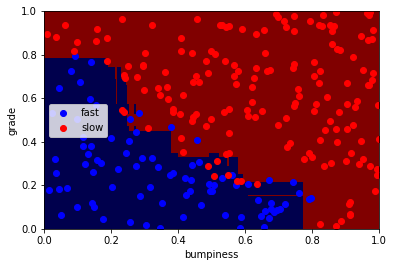

In [76]:
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.show()

# Random Forest

In [42]:
# Investigation process
from sklearn.ensemble import RandomForestClassifier
ab = RandomForestClassifier(n_estimators = 20,criterion= 'gini')
clf = ab.fit(features_train,labels_train)
pred = clf.predict(X_test)

accuracy_score(pred,y_test)

0.91200000000000003

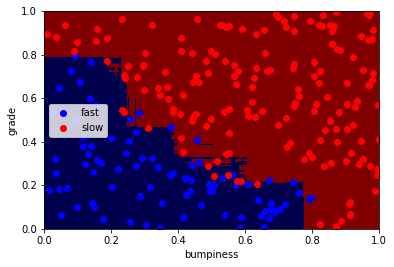

In [43]:
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.show()

# Some experimentation with iris data set

In [157]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import normalize

In [158]:
iris_dt = normalize(iris.data)

In [159]:
if_train,if_test,il_train,il_test = train_test_split(iris_dt[:,0:2],iris.target,train_size=0.7)


In [188]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
clf = dtf.fit(if_train,il_train)

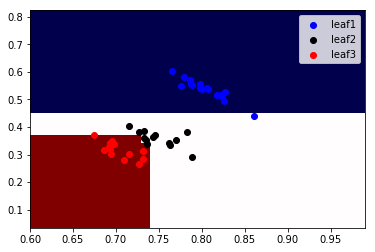

In [189]:
#creating a mesh for plotting


xx_max = np.max(iris_dt[0])
xx_min = np.min(iris_dt[0])
yy_max = np.max(iris_dt[1])
yy_min = np.min(iris_dt[1])
h = 0.01

xx_max = 1
xx_min = 0.6

xaxis = np.arange(xx_min,xx_max,h)
yaxis = np.arange(yy_min,yy_max,h)

xx,yy = np.meshgrid(xaxis,yaxis)

Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(np.shape(xx))

leaf_1_f1 = [if_test[i,0] for i in range(len(il_test)) if il_test[i]== 0]
leaf_1_f2 = [if_test[i,1] for i in range(len(il_test)) if il_test[i]== 0]
leaf_2_f1 = [if_test[i,0] for i in range(len(il_test)) if il_test[i]== 1]
leaf_2_f2 = [if_test[i,1] for i in range(len(il_test)) if il_test[i]== 1]
leaf_3_f1 = [if_test[i,0] for i in range(len(il_test)) if il_test[i]== 2]
leaf_3_f2 = [if_test[i,1] for i in range(len(il_test)) if il_test[i]== 2]


plt.pcolormesh( xx, yy, Z,cmap = plt.cm.seismic)
plt.scatter(leaf_1_f1,leaf_1_f2,color = "blue", label= "leaf1")
plt.scatter(leaf_2_f1,leaf_2_f2,color = "black", label= "leaf2")
plt.scatter(leaf_3_f1,leaf_3_f2,color = "red", label= "leaf3")

plt.legend()

plt.show()






In [190]:
from sklearn.ensemble import RandomForestClassifier
dtf = RandomForestClassifier()
clf = dtf.fit(if_train,il_train)

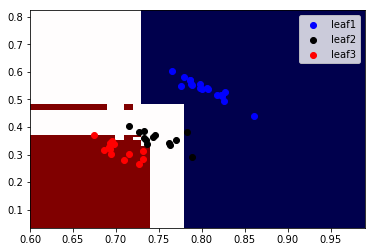

In [192]:
#creating a mesh for plotting


xx_max = np.max(iris_dt[0])
xx_min = np.min(iris_dt[0])
yy_max = np.max(iris_dt[1])
yy_min = np.min(iris_dt[1])
h = 0.01

xx_max = 1
xx_min = 0.6

xaxis = np.arange(xx_min,xx_max,h)
yaxis = np.arange(yy_min,yy_max,h)

xx,yy = np.meshgrid(xaxis,yaxis)

Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(np.shape(xx))

leaf_1_f1 = [if_test[i,0] for i in range(len(il_test)) if il_test[i]== 0]
leaf_1_f2 = [if_test[i,1] for i in range(len(il_test)) if il_test[i]== 0]
leaf_2_f1 = [if_test[i,0] for i in range(len(il_test)) if il_test[i]== 1]
leaf_2_f2 = [if_test[i,1] for i in range(len(il_test)) if il_test[i]== 1]
leaf_3_f1 = [if_test[i,0] for i in range(len(il_test)) if il_test[i]== 2]
leaf_3_f2 = [if_test[i,1] for i in range(len(il_test)) if il_test[i]== 2]


plt.pcolormesh( xx, yy, Z,cmap = plt.cm.seismic)
plt.scatter(leaf_1_f1,leaf_1_f2,color = "blue", label= "leaf1")
plt.scatter(leaf_2_f1,leaf_2_f2,color = "black", label= "leaf2")
plt.scatter(leaf_3_f1,leaf_3_f2,color = "red", label= "leaf3")

plt.legend()

plt.show()






In [220]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf',decision_function_shape='ovo',gamma = 100)
clf = svm.fit(if_train,il_train)

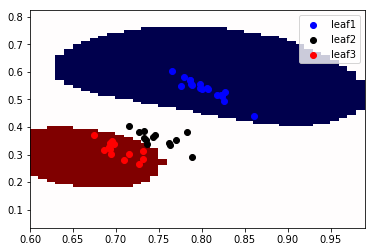

In [221]:
#creating a mesh for plotting


xx_max = np.max(iris_dt[0])
xx_min = np.min(iris_dt[0])
yy_max = np.max(iris_dt[1])
yy_min = np.min(iris_dt[1])
h = 0.01

xx_max = 1
xx_min = 0.6

xaxis = np.arange(xx_min,xx_max,h)
yaxis = np.arange(yy_min,yy_max,h)

xx,yy = np.meshgrid(xaxis,yaxis)

Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(np.shape(xx))

leaf_1_f1 = [if_test[i,0] for i in range(len(il_test)) if il_test[i]== 0]
leaf_1_f2 = [if_test[i,1] for i in range(len(il_test)) if il_test[i]== 0]
leaf_2_f1 = [if_test[i,0] for i in range(len(il_test)) if il_test[i]== 1]
leaf_2_f2 = [if_test[i,1] for i in range(len(il_test)) if il_test[i]== 1]
leaf_3_f1 = [if_test[i,0] for i in range(len(il_test)) if il_test[i]== 2]
leaf_3_f2 = [if_test[i,1] for i in range(len(il_test)) if il_test[i]== 2]


plt.pcolormesh( xx, yy, Z,cmap = plt.cm.seismic)
plt.scatter(leaf_1_f1,leaf_1_f2,color = "blue", label= "leaf1")
plt.scatter(leaf_2_f1,leaf_2_f2,color = "black", label= "leaf2")
plt.scatter(leaf_3_f1,leaf_3_f2,color = "red", label= "leaf3")

plt.legend()

plt.show()






array([0, 1, 2])